# p-value histrogram plots for two cases:

1) p-values as calculated via a permutation test 
2) p-values as calculated assuming that the null follows a chi-squared with one degree distribution



In [1]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
import matplotlib.lines as mlines
import pandas as pd
import scipy.stats as ss
import scipy as sc

In [13]:
f = pd.read_csv('results_suffled1_nonzero.csv', index_col=0)
data1 = f['log_likelihood_ratio']
l = pd.read_csv('results_original_nonzero.csv', index_col=0)
data = l['log_likelihood_ratio']
pval_or = l['pval']

In [4]:
data_null = np.sort(data1)
print(data_null)
# Sort 2D numpy array by 2nd Column
data_act = np.sort(data)
data_act

[-8.00980722e+04 -1.87658010e+02 -9.30845000e-04 ...  2.56412357e+01
  2.82984993e+01  3.72380730e+04]


array([-174.2503223 ,   -0.25459194,   -0.23456818, ...,  137.5189143 ,
        144.75838   ,  175.3902751 ])

In [5]:
#data null xi
position = []
count =0
count2 = 0
count3 = 0
count4 = 0
for i in range(len(data_act)):
    for j in range(len(data_null)):
        
        if data_null[j]==data_act[i]:
            if data_null[j] == 0:
                position.append(j)
                count += 1
                break
            else:
                position.append(j-1)
                count2 += 1
                break
        if data_null[j]>data_act[i]:
            position.append(j-1)
            count3 += 1
            break
        if j == len(data_null) - 1:
            position.append(j)
            count4 += 1
            

In [6]:
#(n-i)/n
p_value_list = []
for i in range(len(position)):
    p_value_list.append((len(data_null) - position[i])/ len(data_null))
#     print(position[i])
positionn = pd.Series(position)
p_value_list

[0.9999327007201023,
 0.9999327007201023,
 0.9999327007201023,
 0.9997981021603068,
 0.9995962043206138,
 0.9995962043206138,
 0.9994616057608183,
 0.999327007201023,
 0.999327007201023,
 0.9992597079211253,
 0.9990578100814321,
 0.9990578100814321,
 0.998855912241739,
 0.998855912241739,
 0.998855912241739,
 0.998855912241739,
 0.998855912241739,
 0.998855912241739,
 0.9986540144020459,
 0.9986540144020459,
 0.9986540144020459,
 0.9986540144020459,
 0.9985867151221481,
 0.9981156201628643,
 0.9981156201628643,
 0.9981156201628643,
 0.9980483208829666,
 0.9979137223231711,
 0.9975772259236826,
 0.9975099266437849,
 0.9975099266437849,
 0.9975099266437849,
 0.9972407295241941,
 0.9972407295241941,
 0.9972407295241941,
 0.9972407295241941,
 0.9972407295241941,
 0.9972407295241941,
 0.9972407295241941,
 0.997038831684501,
 0.9969715324046032,
 0.9969042331247056,
 0.9969042331247056,
 0.9968369338448079,
 0.9968369338448079,
 0.9967696345649102,
 0.9967696345649102,
 0.9967696345649102,
 

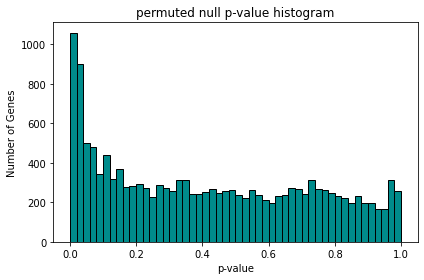

In [35]:
plt.hist(pval, bins=50, color='darkcyan', ec='k');
plt.title('permuted null p-value histogram')
plt.ylabel('Number of Genes')
plt.xlabel('p-value');
plt.tight_layout()
# plt.savefig('chi_pval_plot.pdf', bbox_inches='tight', dpi=150);

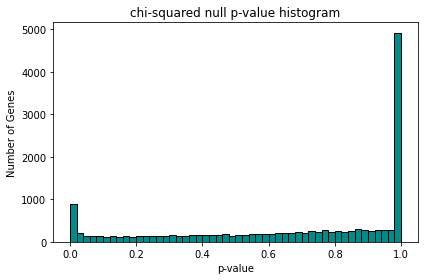

In [36]:
plt.hist(pval_or, bins=50, color='darkcyan', ec='k');
plt.title('chi-squared null p-value histogram')
plt.ylabel('Number of Genes')
plt.xlabel('p-value');
plt.tight_layout()
# plt.savefig('chi_pval_plot.pdf', bbox_inches='tight', dpi=150);